# Вариант 4

## Условие:

Решить систему уравнений методом Гаусса и методом минимальных невязок с точностью $10^{-3}$, сравнить результаты. Построить график ошибки и критерия останова на каждой итерации метода минимальных невязок. Проверить строгое диагональное преобладание, решить задачу со значительным нарушением диагонального преобладания (изменить коэффициенты матрицы), построить график ошибки.

In [29]:
Github_Copilot = "🤡"

"🤡"

In [1]:
A = Matrix([-8.3 1.27 -2.7 2.91 -1.05; 
1.27 12.6 3.09 -1.2 1.21;
 -2.7 3.09 -9.26 3.02 0.0;
2.91 -1.2 3.02 -11.8 1.66;
-1.05 1.21 0.0 1.66 7.51])


5×5 Matrix{Float64}:
 -8.3    1.27  -2.7     2.91  -1.05
  1.27  12.6    3.09   -1.2    1.21
 -2.7    3.09  -9.26    3.02   0.0
  2.91  -1.2    3.02  -11.8    1.66
 -1.05   1.21   0.0     1.66   7.51

In [2]:
n = 1:4

f = Vector([28.58, 21.9, 36.53, -44.45, -29.55])

5-element Vector{Float64}:
  28.58
  21.9
  36.53
 -44.45
 -29.55

# Решение методом гаусса

## Прямой ход

In [3]:
for i ∈ n
    for j ∈ i+1:5
        q = A[j, i]/A[i, i]
        A[j, :] -= @. A[i, :] * q
        f[j] -= f[i] * q
    end
end
println("A = $A")
println("f = $f")

A = [-8.3 1.27 -2.7 2.91 -1.05; 0.0 12.794325301204818 2.676867469879518 -0.7547349397590362 1.0493373493975904; 0.0 0.0 -8.941749062319609 2.231281422769319 0.12202072831611152; 0.0 0.0 0.0 -10.267485339301638 1.3842161613784776; 0.0 0.0 0.0 0.0 7.745047949862775]
f = [28.58, 26.273084337349395, 21.735957328597298, -27.456051485495667, -38.72523974931387]


In [4]:
print("Итоговая матрица")
A

Итоговая матрица

5×5 Matrix{Float64}:
 -8.3   1.27    -2.7        2.91      -1.05
  0.0  12.7943   2.67687   -0.754735   1.04934
  0.0   0.0     -8.94175    2.23128    0.122021
  0.0   0.0      0.0      -10.2675     1.38422
  0.0   0.0      0.0        0.0        7.74505

Матрица сведена к верхнему треугольному виду.

In [5]:
print("Правая часть")
f

Правая часть

5-element Vector{Float64}:
  28.58
  26.273084337349395
  21.735957328597298
 -27.456051485495667
 -38.72523974931387

## Обратный ход

In [6]:
x = Vector{Float64}(undef, 5)
x[5] = f[5] / A[5, 5]
#= x = [(f[k]* - sum([A[k, j] * x[j] for j ∈ k+1:5])/A[k, k]) for k ∈ 4:1]
print(x) =#
for k ∈ reverse(1:4)
    x[k] = (f[k] - sum([A[k, j] * x[j] for j ∈ k+1:5]))/A[k, k]
end
x

5-element Vector{Float64}:
 -0.9999999999999996
  3.0000000000000004
 -2.0
  2.0000000000000004
 -5.0

In [7]:
# Восстанавливаем исходные данные
A = Matrix([-8.3 1.27 -2.7 2.91 -1.05; 
1.27 12.6 3.09 -1.2 1.21;
 -2.7 3.09 -9.26 3.02 0.0;
2.91 -1.2 3.02 -11.8 1.66;
-1.05 1.21 0.0 1.66 7.51])

f = Vector([28.58, 21.9, 36.53, -44.45, -29.55])
# Проверяем решение
println("$(A * x) = $f")

if A * x ≈ f 
    print("Сошлось!")
else
    print("Не сошлось.")
end

[28.58, 21.900000000000006, 36.53, -44.45, -29.549999999999997] = [28.58, 21.9, 36.53, -44.45, -29.55]


Сошлось!

# Решение методом намиеньших невязок

In [8]:
function dot(x, y) # Скалярное произведение
    z = @. x * y
    return sum(z)
end

function euclidean(x, y) # Евклидовое расстояние
    z = @. (x - y) ^ 2
    return sqrt(sum(z))
end

using Plots

Относительно точный ответ мы получили с помощью метода Гаусса. Намеренно выберем далёкую от него точку, чтобы проверить метод наименьших невязок; обозначим его g --- "guess".
Используем евклидову меру для критерия останова.

\begin{equation*}
    ||x_{k+1} - x_k|| \le 10^{-3} \\
\end{equation*}

\begin{equation*}
    \sqrt{\sum_{i=1}^{5} |u_i|^2} \\
\end{equation*}

In [9]:
g = Vector([3.05, 9.01, 9.01, 0.47, 4.99])

5-element Vector{Float64}:
 3.05
 9.01
 9.01
 0.47
 4.99

Ниже реализован сам метод наименьших невязок:

\begin{equation*}
    x_{k+1} = x_k - \tau_k (Ax_x - f)
\end{equation*}

\begin{equation*}
    r_k = Ax_k - f
\end{equation*}

\begin{equation*}
    \tau_k = \frac{(r_k, r_k)}{(Ar_k, r_k)}
\end{equation*}

In [10]:
function R(x)
    return (A * x) - f
end

function Τ(r)
    return dot(r, A*r) / dot(A*r, A*r)
end

function χ(g, r, τ)
    return g - (τ * r)
end

function nv(g) # Метод наменьших невязок
    r = R(g)
    τ = Τ(r)
    return χ(g, r, τ)
end

nv (generic function with 1 method)

In [11]:
niter = 0
err = []
stop =[]
while euclidean(g, nv(g)) >= 10 ^ (-3)
    niter +=1
    append!(err, [euclidean(g, x)])
    append!(stop, [euclidean(g, nv(g))])
    g = nv(g)
end
g

5-element Vector{Float64}:
 -1.0065788500597928
  2.9984174814607134
 -1.9952686310857621
  2.000100102321156
 -4.994143992858409

### Построим графики

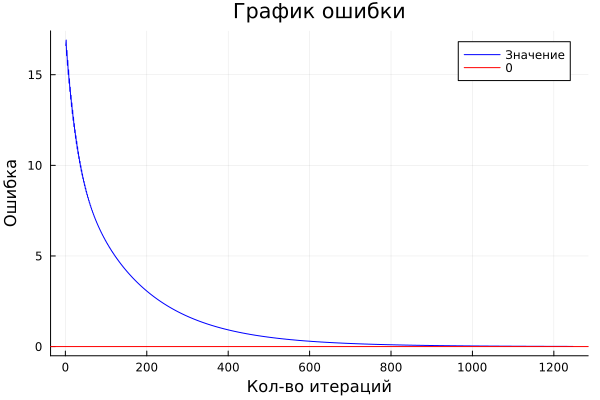

In [12]:
iter = 1:niter
G1 = plot(iter, err, title="График ошибки", label="Значение", color="blue") 
xlabel!("Кол-во итераций")
ylabel!("Ошибка")
hline!([0], label="0", color="red")

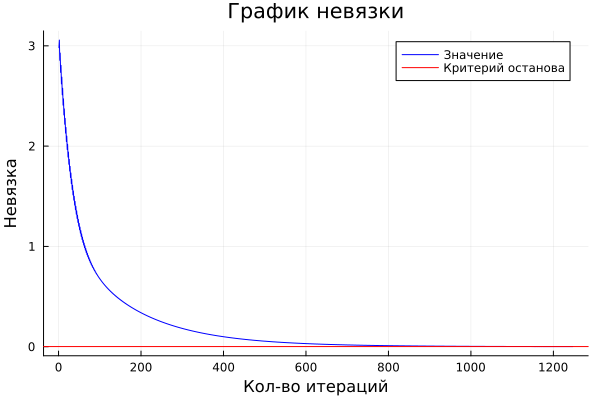

In [13]:
G2 = plot(iter, stop, title="График невязки", label="Значение", color = "blue")
xlabel!("Кол-во итераций")
ylabel!("Невязка")
hline!([10^(-3)], label="Критерий останова", color="red")

In [14]:
# Проверяем решение
println("$(A * g) = $f")

if euclidean(A * g, f) <= 10 ^ (-1) 
    print("Сошлось!")
else
    print("Не сошлось.")
end

[28.61396245113884, 21.893290702629983, 36.49936274573909, -44.444416932840454, -29.500862271383287] = [28.58, 21.9, 36.53, -44.45, -29.55]
Сошлось!

### Проверим строгое диагональное преобладание

In [15]:
function dd(M)
    for i ∈ 1:Int(sqrt(length(A)))
        if abs(2 * A[i, i]) <= abs(sum(A[i, :]))
            return false
        end
    end
    return true
end


dd (generic function with 1 method)

In [16]:
dd(A)

true

## Как мы видим, матрица имеет строгое диагональное преобладание. Давайте это исправим.

In [17]:
for i ∈ 1:Int(sqrt(length(A)))
    A[i, i] = 1
end
A

5×5 Matrix{Float64}:
  1.0    1.27  -2.7    2.91  -1.05
  1.27   1.0    3.09  -1.2    1.21
 -2.7    3.09   1.0    3.02   0.0
  2.91  -1.2    3.02   1.0    1.66
 -1.05   1.21   0.0    1.66   1.0

In [18]:
dd(A)

false

Теперь повторим методы решения для этой новой матрицы.

# Решение методом гаусса

## Прямой ход

In [19]:
for i ∈ n
    for j ∈ i+1:5
        q = A[j, i]/A[i, i]
        A[j, :] -= @. A[i, :] * q
        f[j] -= f[i] * q
    end
end
println("A = $A")
println("f = $f")

A = [1.0 1.27 -2.7 2.91 -1.05; 0.0 -0.6129 6.519 -4.895700000000001 2.5435; 0.0 8.881784197001252e-16 63.04816446402349 -41.19522760646109 24.21847772883015; 0.0 5.803295379926852e-16 0.0 4.720919547324147 0.22280773076702154; 0.0 -3.6856210207550126e-16 0.0 0.0 1.139402388322451]
f = [28.58, -14.3966, -39.430832109642665, -38.384998458939464, -42.328023998536516]


In [20]:
print("Итоговая матрица")
A

Итоговая матрица

5×5 Matrix{Float64}:
 1.0   1.27         -2.7       2.91     -1.05
 0.0  -0.6129        6.519    -4.8957    2.5435
 0.0   8.88178e-16  63.0482  -41.1952   24.2185
 0.0   5.8033e-16    0.0       4.72092   0.222808
 0.0  -3.68562e-16   0.0       0.0       1.1394

In [21]:
print("Правая часть")
f

Правая часть

5-element Vector{Float64}:
  28.58
 -14.3966
 -39.430832109642665
 -38.384998458939464
 -42.328023998536516

## Обратный ход

In [22]:
x = Vector{Float64}(undef, 5)
x[5] = f[5] / A[5, 5]
#= x = [(f[k]* - sum([A[k, j] * x[j] for j ∈ k+1:5])/A[k, k]) for k ∈ 4:1]
print(x) =#
for k ∈ reverse(1:4)
    x[k] = (f[k] - sum([A[k, j] * x[j] for j ∈ k+1:5]))/A[k, k]
end
x

5-element Vector{Float64}:
   6.961502449480385
  21.07075234744476
   9.47759594785142
  -6.3775377774366735
 -37.14932005790888

In [23]:
# Восстанавливаем исходные данные
A = Matrix([-8.3 1.27 -2.7 2.91 -1.05; 
1.27 12.6 3.09 -1.2 1.21;
 -2.7 3.09 -9.26 3.02 0.0;
2.91 -1.2 3.02 -11.8 1.66;
-1.05 1.21 0.0 1.66 7.51])
for i ∈ 1:Int(sqrt(length(A)))
    A[i, i] = 1
end

f = Vector([28.58, 21.9, 36.53, -44.45, -29.55])
# Проверяем решение
println("$(A * x) = $f")

if A * x ≈ f 
    print("Сошлось!")
else
    print("Не сошлось.")
end

[28.580000000000002, 21.899999999999995, 36.52999999999993, -44.44999999999992, -29.550000000000004] = [28.58, 21.9, 36.53, -44.45, -29.55]
Сошлось!

# Решение методом намиеньших невязок

In [24]:
g = Vector([3.05, 9.01, 9.01, 0.47, 4.99])

5-element Vector{Float64}:
 3.05
 9.01
 9.01
 0.47
 4.99

In [25]:
niter = 0
err = []
stop = []
while euclidean(g, nv(g)) >= 10 ^ (-3)
    niter +=1
    append!(err, [euclidean(g, x)])
    append!(stop, [euclidean(g, nv(g))])
    g = nv(g)
end
g

5-element Vector{Float64}:
   6.965544076846998
  21.083541930682532
   9.449252361186051
  -6.391538433576582
 -37.08583209478766

In [26]:
# Проверяем решение
println("$(A * g) = $f")

if euclidean(A * g, f) <= 10 ^ (-1) 
    print("Сошлось!")
else
    print("Не сошлось.")
end

[28.56940781143066, 21.923961989941947, 36.4879818501069, -44.4477946333365, -29.498521439088275] = [28.58, 21.9, 36.53, -44.45, -29.55]
Сошлось!

### Построим графики

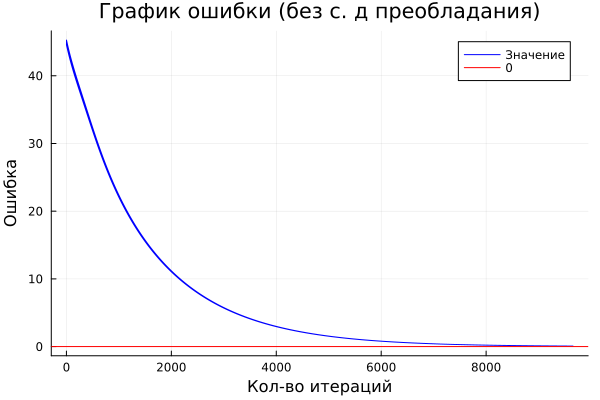

In [27]:
iter = 1:niter
G3 = plot(iter, err, title="График ошибки (без с. д преобладания)", label="Значение", color = "blue")
xlabel!("Кол-во итераций")
ylabel!("Ошибка")
hline!([0], label="0", color="red")

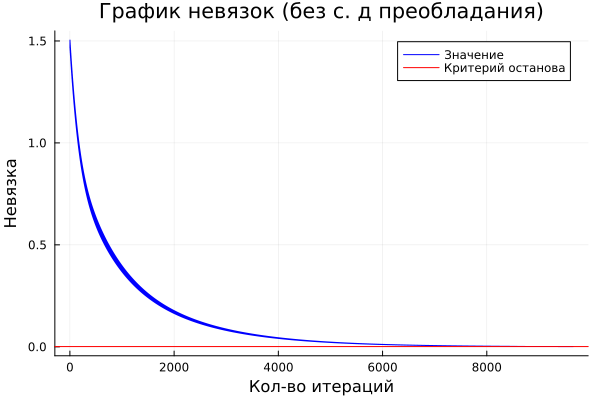

In [28]:
G4 = plot(iter, stop, title="График невязок (без с. д преобладания)", label="Значение", color = "blue")
xlabel!("Кол-во итераций")
ylabel!("Невязка")
hline!([10^(-3)], label="Критерий останова", color="red")